# Dales Omuse interface basics

## imports

In [ ]:
import numpy 
from omuse.units import units
from omuse.community.dales.interface import Dales
import matplotlib
import matplotlib.pyplot as plt
import os


## Initialization

In [11]:
# create a dales object
d=Dales()

# set parameters
d.itot = 32  # number of grid cells in x
d.jtot = 32  # number of grid cells in y
d.xsize = 6400 | units.m
d.ysize = 6400 | units.m





## Time stepping

In [35]:
d.evolve_model(60 | units.s)

quantity<5.64003130421e-07 s>

## Accessing data

`d.grid` contains 3D prognostic variables: (E12, QL, QT, T, THL, U, V, W, x, y, z). They are accessed as numpy arrays, 
`d.grid.THL[x,y,z]`. 
The grids contain quantities with units. To plot, use e.g.  `d.grid.THL[:,1,:].value_in(unist.K)`

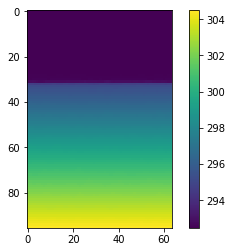

In [36]:
# get an xz crossection
crossection = d.grid.THL[:,1,:].value_in(units.K) 
plt.imshow(crossection.T)
plt.colorbar()

## Methods for online documentation

### Functions

In [16]:
help(d)

Help on Dales in module omuse.community.dales.interface object:

class Dales(amuse.community.interface.common.CommonCode)
 |  Method resolution order:
 |      Dales
 |      amuse.community.interface.common.CommonCode
 |      amuse.support.interface.InCodeComponentImplementation
 |      amuse.support.interface.OldObjectsBindingMixin
 |      amuse.support.options.OptionalAttributes
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **options)
 |  
 |  commit_grid(self)
 |  
 |  commit_parameters(self)
 |  
 |  define_grids(self, object)
 |  
 |  define_parameters(self, object)
 |  
 |  define_properties(self, object)
 |  
 |  define_state(self, object)
 |  
 |  get_dx(self)
 |  
 |  get_dy(self)
 |  
 |  get_field(self, field, imin=0, imax=None, jmin=0, jmax=None, kmin=0, kmax=None)
 |      # retrieve a 3D field
 |      # field is 'U', 'V', 'W', 'THL', 'QT', 'QL', 'E12', 'T'
 |  
 |  get_grid_position(self, i, j, k)
 |  
 |  get_grid_range(self)
 |  
 |  ge

### Parameters

In [5]:
help(d.parameters)

Help on ParametersWithDocs in module amuse.datamodel.parameters object:

Parameters = class ParametersWithDocs(Parameters)
 |  Parameters: 
 |  input_file
 |  
 |      the input file name (default value:None)
 |  
 |  restart_flag
 |  
 |      warm start from restart file if True (default value:False)
 |  
 |  restart_file
 |  
 |      restart file name (default value:initdlatestx000y000.001)
 |  
 |  trestart
 |  
 |      (simulation) time between writing restart files (default value:3600 s)
 |  
 |  itot
 |  
 |      number of cells in the x direction (default value:None)
 |  
 |  jtot
 |  
 |      number of cells in the y direction (default value:None)
 |  
 |  xsize
 |  
 |      size of the grid the x direction (default value:None)
 |  
 |  ysize
 |  
 |      size of the grid the y direction (default value:None)
 |  
 |  dx
 |  
 |      grid spacing in x direction (default value:None)
 |  
 |  dy
 |  
 |      grid spacing in y direction (default value:None)
 |  
 |  workdir
 |  
 |